In [1]:
%matplotlib inline

import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('ggplot')

In [2]:
# read the dataset
df = pd.read_csv('data.csv', header=None)
df.columns = ['timestamp', 'value']
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,value
0,2014-01-05 02:00:00,2.030274
1,2014-01-05 02:01:00,2.398184
2,2014-01-05 02:02:00,2.417620
3,2014-01-05 02:03:00,2.614675
4,2014-01-05 02:04:00,2.161892


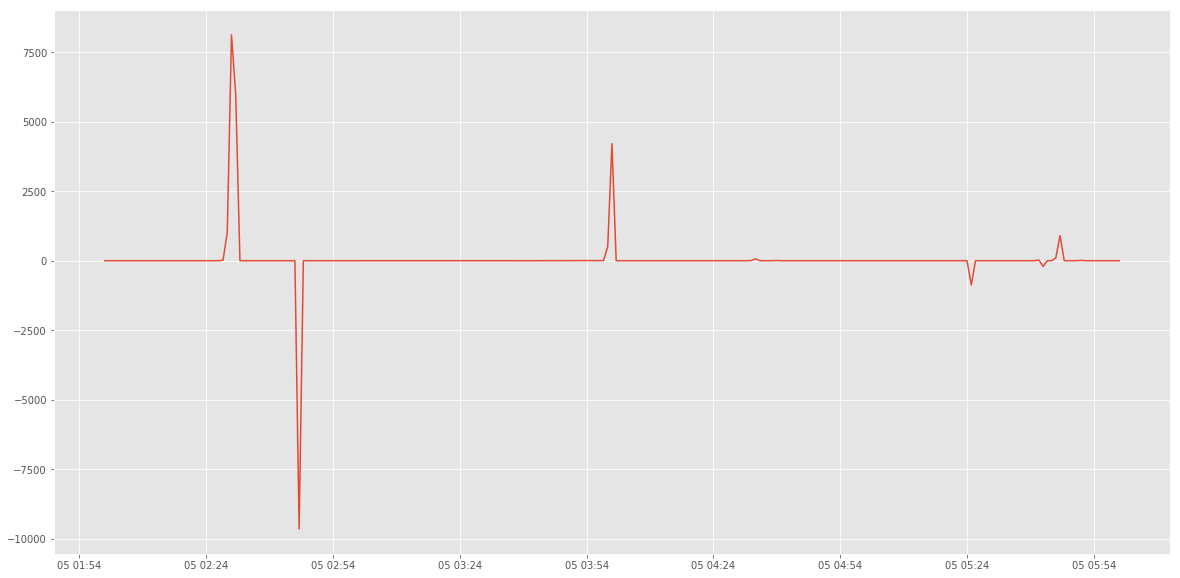

In [3]:
# plot the dataset
plt.figure(figsize=(20,10))
plt.plot(df.timestamp, df.value)

In [4]:
# create AnomalyDetector object with dataset location as parameter
detector  = AnomalyDetector('data.csv')
anomalies = detector.get_anomalies()
anomalyList = [datetime.fromtimestamp(x.exact_timestamp / 1000.0)  for x in anomalies]
anomalyList

[datetime.datetime(2014, 1, 5, 2, 31),
 datetime.datetime(2014, 1, 5, 2, 48),
 datetime.datetime(2014, 1, 5, 4, 0)]

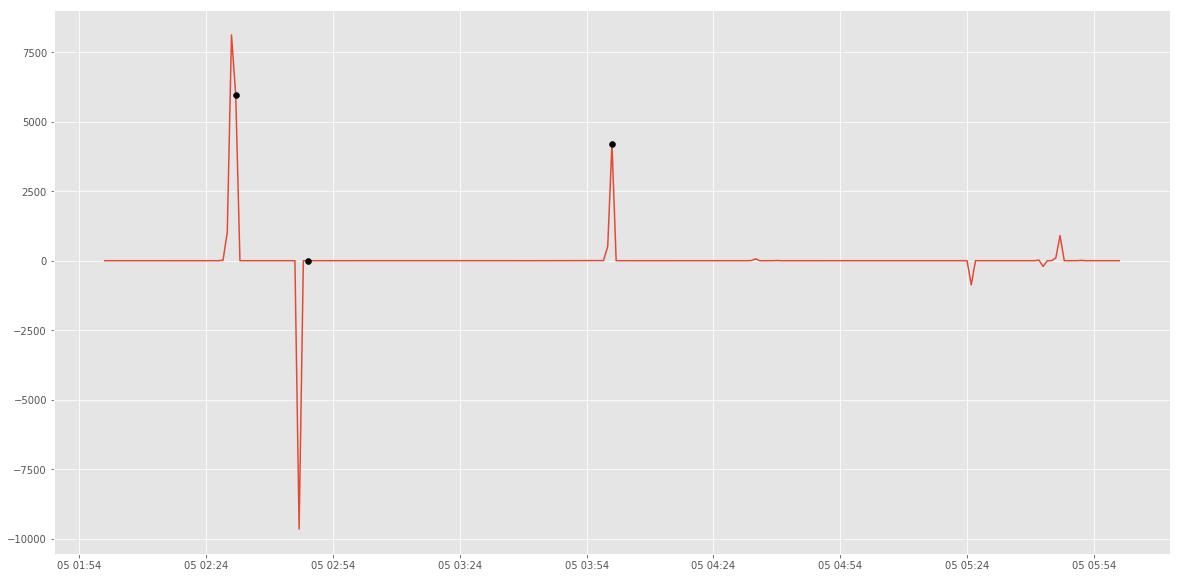

In [13]:
# plot the anomalies
plt.figure(figsize=(20,10))
plt.plot(df.timestamp, df.value, zorder=1)

for anomaly in anomalyList:
    plt.scatter(anomaly, df[df.timestamp == anomaly].value, color='black', zorder=2)